<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/context_awareness/context_utlization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>


<h1 style="text-align: center;">Context Conciseness</h1>


**What is Context Reranking?**: Context conciseness refers to the quality of a reference context generated from retrieved context in terms of being clear, brief, and to the point. A concise context effectively conveys the necessary information without unnecessary elaboration or verbosity. 


**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description                     |
| ----------- | ------------------------------- |
| question    | The question asked by the user  |
| context | Additional information provided that can be used to answer the question |
| concise_context | Concise context retrieved from the original context |

 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
# !pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
data = [
    {
        'question': 'What is the capital of France?',
        'context': 'Paris is the capital of France. It is a place where people speak French and enjoy baguettes. I once heard that the Eiffel Tower was built by aliens, but don\'t quote me on that.',
        'concise_context': 'Paris is the capital of France.'
    },
    {
        'question': 'What is the capital of France?',
        'context': 'France has a capital city named Paris. It is a place where people speak French and enjoy baguettes. I once heard that the Eiffel Tower was built by aliens, but don\'t quote me on that.',
        'concise_context': 'It is a place where people speak French and enjoy baguettes.'
    }
]

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals
import json

OPENAI_API_KEY = "sk-********************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.CONTEXT_CONCISENESS]
)

print(json.dumps(res,indent=3))

/Users/shreyanshjain/anaconda3/lib/python3.11/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
2024-02-28 14:38:39.973 | INFO     | uptrain.framework.evalllm:evaluate_on_server:216 - Sending evaluation request for rows 0 to <50 to the Uptrain


[
   {
      "question": "What is the capital of France?",
      "context": "Paris is the capital of France. It is a place where people speak French and enjoy baguettes. I once heard that the Eiffel Tower was built by aliens, but don't quote me on that.",
      "concise_context": "Paris is the capital of France.",
      "score_context_conciseness": 1.0,
      "explanation_context_conciseness": "Step 1: Identify the question and the original context.\n- The question is \"What is the capital of France?\"\n- The original context provides additional information about Paris, such as the language spoken and a mention of the Eiffel Tower.\n\nStep 2: Compare the original context with the concise context.\n- The original context provides additional information about the language spoken and a mention of the Eiffel Tower, which is not included in the concise context.\n\nStep 3: Evaluate the relevance of the additional information.\n- The language spoken in Paris and the mention of the Eiffel Towe

## Step 4: Let's look at some of the results 

### Sample with Good Concise Context

In [4]:
print(json.dumps(res[0],indent=3))

{
   "question": "What is the capital of France?",
   "context": "Paris is the capital of France. It is a place where people speak French and enjoy baguettes. I once heard that the Eiffel Tower was built by aliens, but don't quote me on that.",
   "concise_context": "Paris is the capital of France.",
   "score_context_conciseness": 1.0,
   "explanation_context_conciseness": "Step 1: Identify the question and the original context.\n- The question is \"What is the capital of France?\"\n- The original context provides additional information about Paris, such as the language spoken and a mention of the Eiffel Tower.\n\nStep 2: Compare the original context with the concise context.\n- The original context provides additional information about the language spoken and a mention of the Eiffel Tower, which is not included in the concise context.\n\nStep 3: Evaluate the relevance of the additional information.\n- The language spoken in Paris and the mention of the Eiffel Tower are not directly r

### Sample with Poor Concise Context

In [5]:
print(json.dumps(res[1],indent=3))

{
   "question": "What is the capital of France?",
   "context": "France has a capital city named Paris. It is a place where people speak French and enjoy baguettes. I once heard that the Eiffel Tower was built by aliens, but don't quote me on that.",
   "concise_context": "It is a place where people speak French and enjoy baguettes.",
   "score_context_conciseness": 0.0,
   "explanation_context_conciseness": "Step by step reasoning:\n1. The question is \"What is the capital of France?\"\n2. Original context: \"France has a capital city named Paris.\"\n3. Concise context: \"It is a place where people speak French and enjoy baguettes.\"\n4. The original context explicitly states that Paris is the capital of France, while the concise context does not mention this information.\n5. The concise context only provides information about the language and food in France, but it does not mention the capital city.\n\n[Choice]: (C) The concise context doesn't cover the relevant information from the

## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [6]:
from uptrain import Evals, APIClient, Settings

UPTRAIN_API_KEY = "up-********************"  # Insert your UpTrain API key here

uptrain_client = APIClient(
    Settings(
        uptrain_access_token=UPTRAIN_API_KEY, response_format={"type": "json_object"}
    )
)

res = uptrain_client.log_and_evaluate(
    "Sample-context-conciseness-test", 
    data = data, 
    checks = [Evals.CONTEXT_CONCISENESS]
)

print(json.dumps(res, indent=3))

2024-02-28 14:40:55.182 | INFO     | uptrain.framework.remote:log_and_evaluate:669 - Sending evaluation request for rows 0 to <50 to the Uptrain server


[
   {
      "question": "What is the capital of France?",
      "context": "Paris is the capital of France. It is a place where people speak French and enjoy baguettes. I once heard that the Eiffel Tower was built by aliens, but don't quote me on that.",
      "concise_context": "Paris is the capital of France.",
      "score_context_conciseness": 1.0,
      "explanation_context_conciseness": "Step 1: Identify the question and the original context.\n- The question is \"What is the capital of France?\"\n- The original context provides the information that \"Paris is the capital of France.\"\n\nStep 2: Compare the original context with the concise context.\n- The original context provides additional information about Paris, such as the language spoken and a humorous comment about the Eiffel Tower.\n- The concise context only states \"Paris is the capital of France\" without including the additional details.\n\nStep 3: Evaluate the relevance of the additional information.\n- The addition

### Dashboards: 
Histogram of score vs number of cases with that score

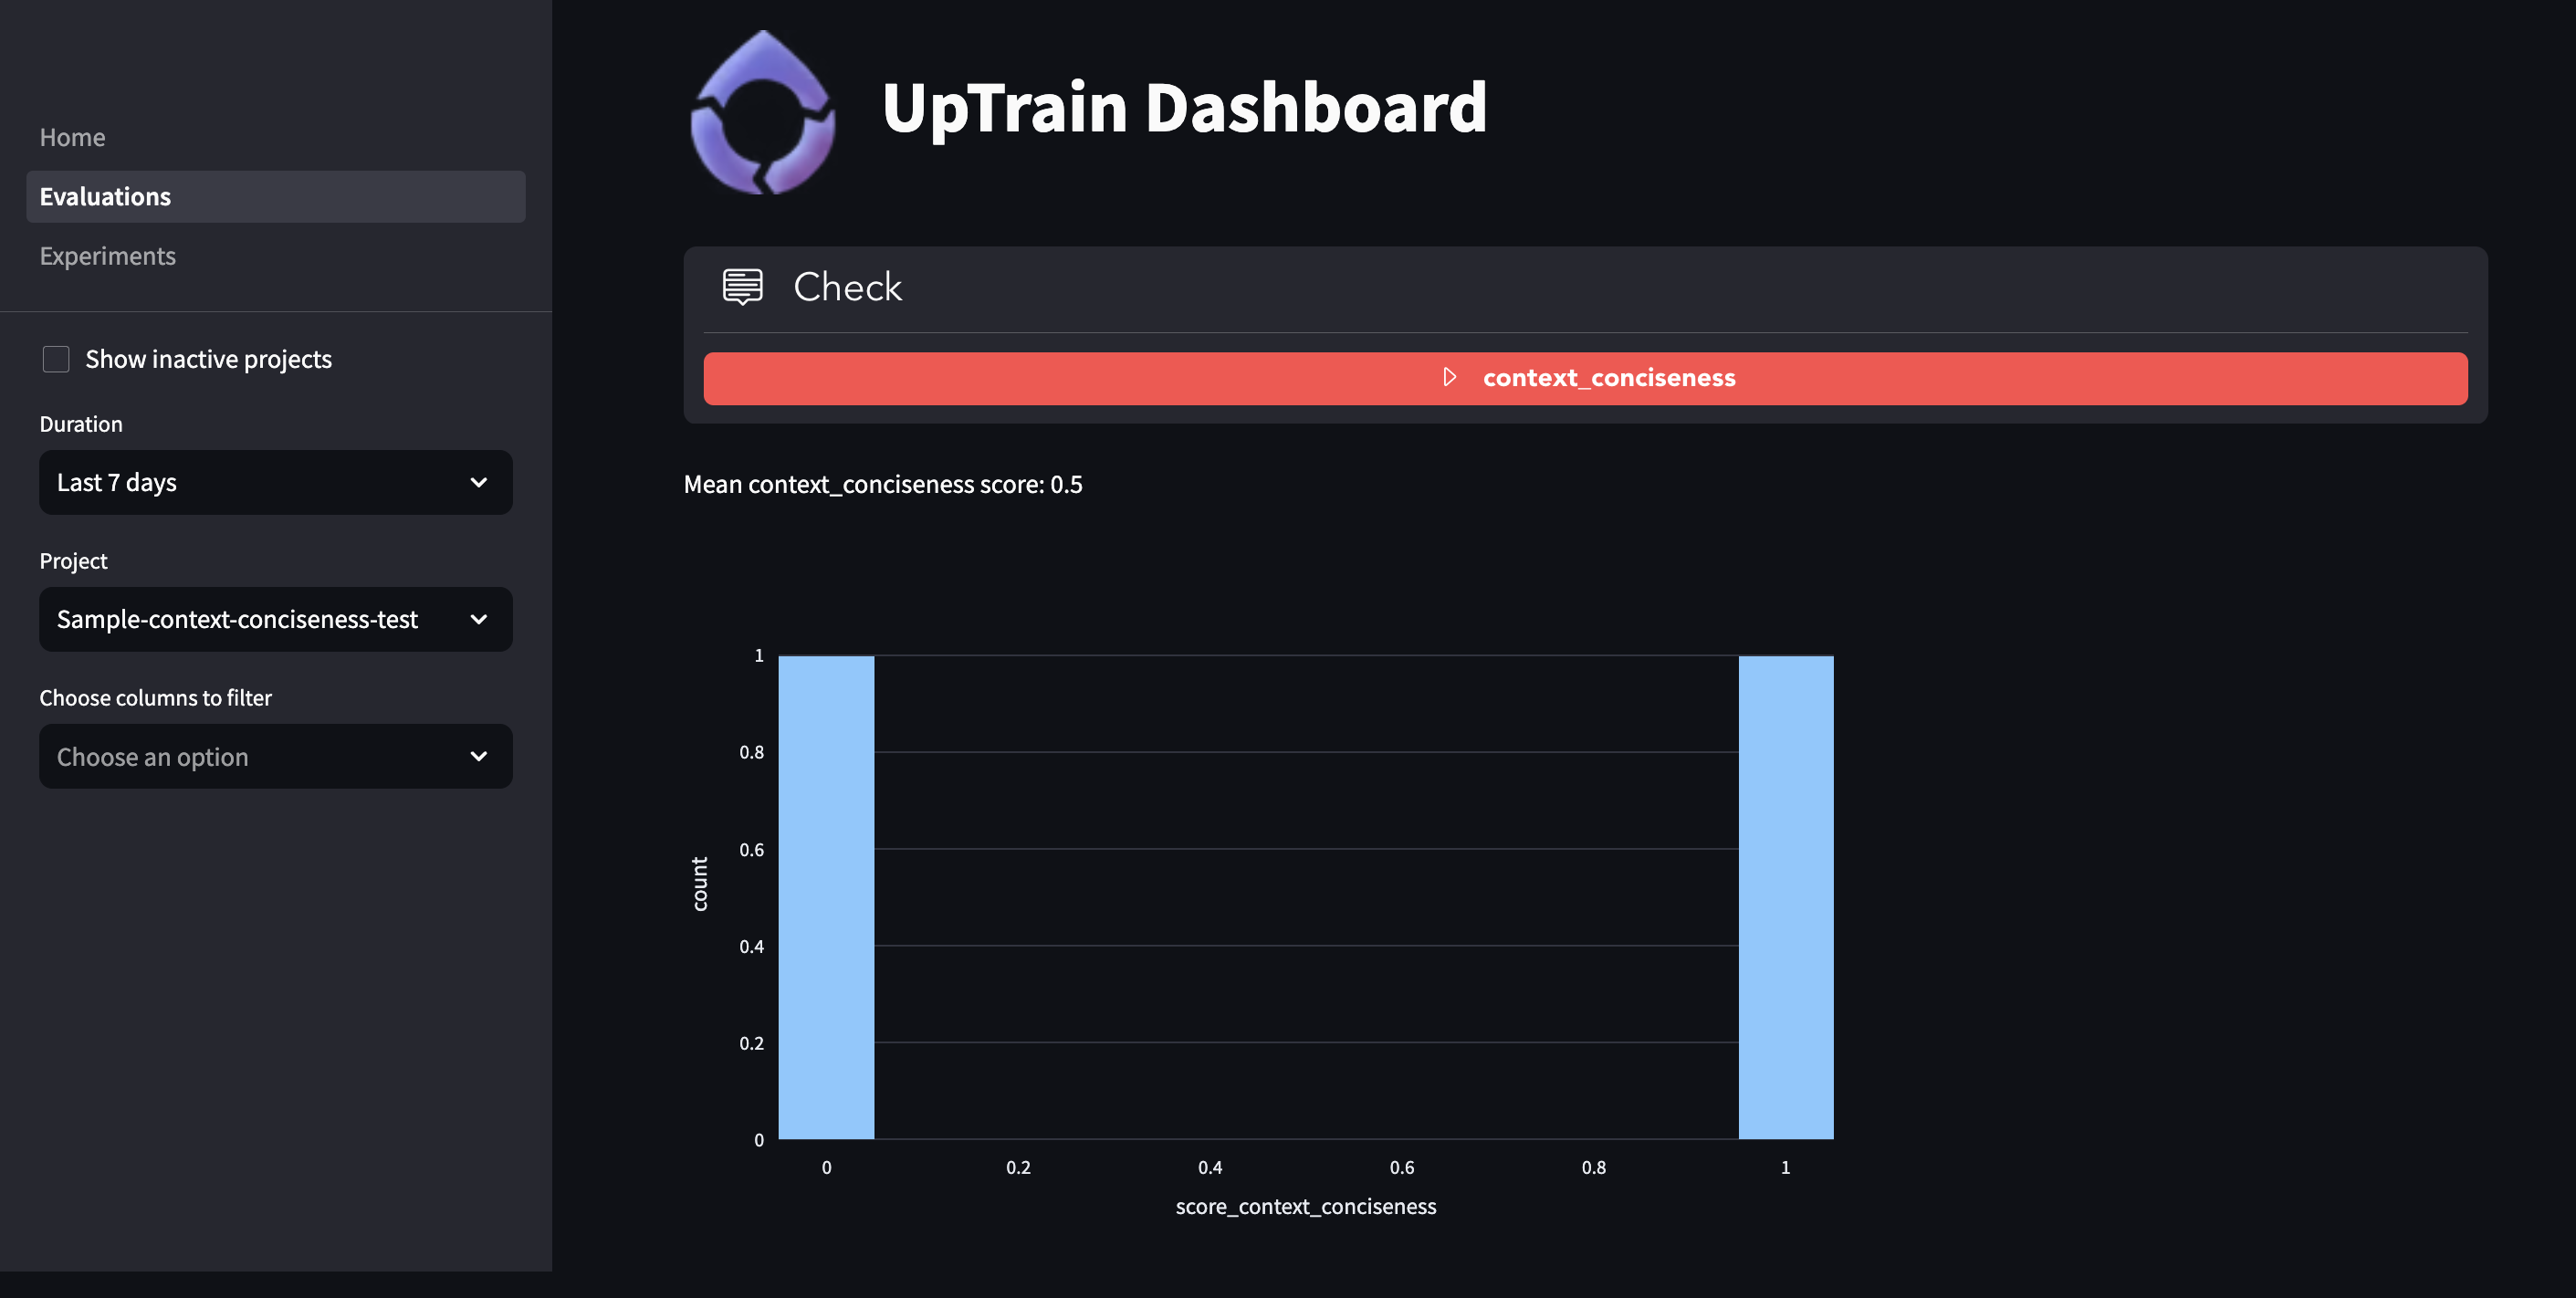

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

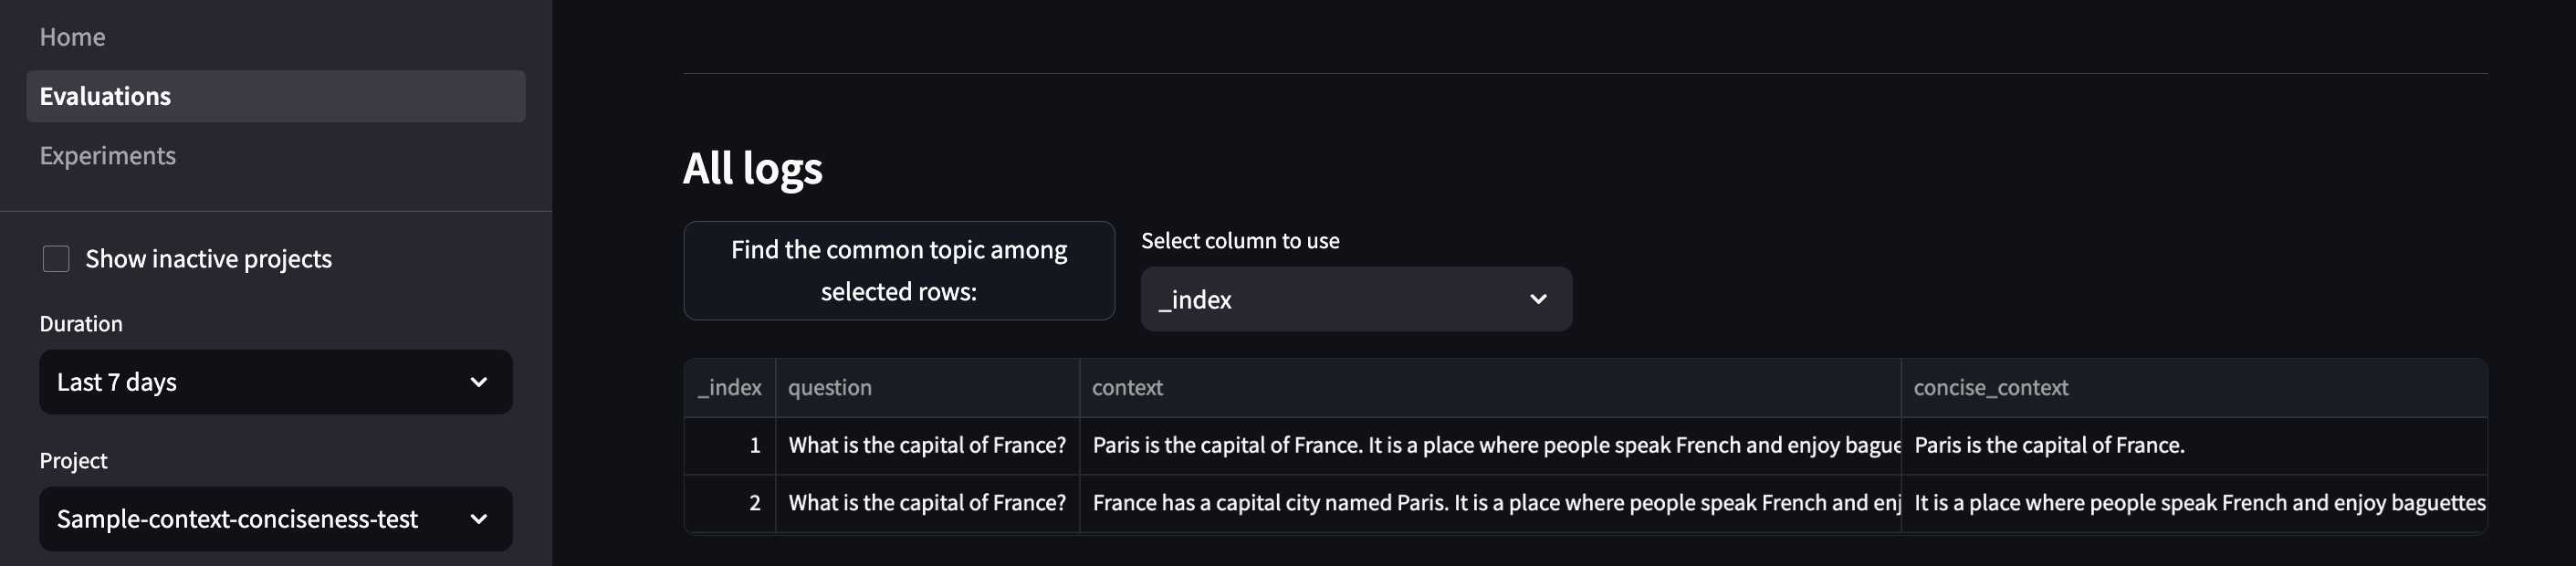